In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
from collections import defaultdict
style.use('fivethirtyeight')
import pandas as pd
import random

In [24]:
df = pd.read_csv('Dataset.csv')
original_df = pd.DataFrame.copy(df)
df.replace('?',-9999, inplace=True)
df.drop(['id'], 1, inplace=True)
df.drop(['label'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

In [25]:
test_size=0.2
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]


In [40]:
class K_means:
 
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
            
    def fit(self,data):
        #centroid dict
        self.centroids = {}
        # since k=2 we will select first two points from the data and we will declare that as a centroid
        
        self.track={}
        for i in range(self.k):
            self.track[i]=[]
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            self.track[i].append(data[i])
            
        # we will run this loop for 300 times (300 iteration)
        for i in range(self.max_iter):
            self.classifications = {}  #{2: [], 4: []}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:  #finding distance from centroid , finding mini value , putting them in classification
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in 
                                                                                    self.centroids]
                classification = distances.index(min(distances)) #find the index of the min distance

                self.classifications[classification].append(featureset)
    

            prev_centroids = dict(self.centroids)
                            
            for classification in self.classifications:

                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                self.track[classification].append(np.average(self.classifications[classification],axis=0))
                #print(self.centroids)
            optimized = True
              
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
          
            if optimized:
                break
                
            
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        #print(distances)
        classification = distances.index(min(distances))
        return classification

In [41]:
clf=K_means()

In [42]:
clf.fit(np.array(train_data))

In [43]:
clf.predict(np.array(test_data))

2

In [50]:
labels = original_df['label'].tolist()[:int(0.2*len(full_data))]
#takes testing data corresponding to original data
test_set = []
for i in labels:
    if i == 2:
        test_set.append(0)
    else:
        test_set.append(1)

In [51]:
acc=[]
for i in range(1,4):
    clf = K_means(k=i)
    clf.fit(np.array(train_data))
    correct = 0
    total = 0
    for j in range(len(test_data)):
        if(clf.predict(test_data[j]) == test_set[j]):
            correct+=1
        total += 1
    print("Acc:",i," ",(correct/total)*100,"%")
    acc.append(correct/total)

Acc: 1   55.39568345323741 %
Acc: 2   43.884892086330936 %
Acc: 3   8.633093525179856 %


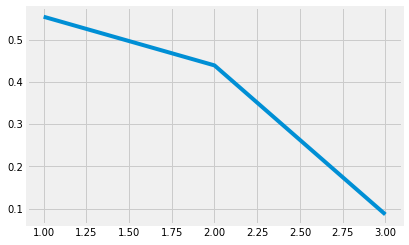

In [52]:
plt.plot([1,2,3],acc)
plt.show()